In [1]:
import os
from ms2deepscore.MS2DeepScore import MS2DeepScore
from ms2deepscore.models.load_model import load_model
from matchms.importing.load_from_mgf import load_from_mgf
data_folder = "../../../data/pytorch/gnps_21_08_23_min_5_at_5_percent/trained_models/both_mode_precursor_mz_ionmode_2000_2000_2000_layers_500_embedding_2024_01_31_11_51_10/"

model = MS2DeepScore(load_model(os.path.join(data_folder, "ms2deepscore_model.pt")))
pos_spectra = list(load_from_mgf(os.path.join(data_folder, "../../training_and_validation_split/positive_validation_spectra.mgf")))
neg_spectra = list(load_from_mgf(os.path.join(data_folder, "../../training_and_validation_split/negative_validation_spectra.mgf")))

In [2]:
pos_embeddings = model.get_embedding_array(pos_spectra)


9705it [01:06, 145.46it/s]


In [71]:
neg_embeddings = model.get_embedding_array(neg_spectra)


1754it [00:10, 162.44it/s]


In [5]:
import umap
import numpy as np
cosine_umap = umap.UMAP(n_components = 2, n_neighbors = 50, min_dist = 0.75, metric = "cosine", random_state = 42)
fit_model = cosine_umap.fit(np.vstack([pos_embeddings,neg_embeddings]))

C:\Users\jonge094\AppData\Local\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


C:\Users\jonge094\AppData\Local\Temp\ipykernel_21020\3694307704.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pos_results[:, 0], pos_results[:, 1], s=2, cmap='viridis', label="positive")
C:\Users\jonge094\AppData\Local\Temp\ipykernel_21020\3694307704.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(neg_results[:, 0], neg_results[:, 1], s=2, cmap='viridis', label="negative")


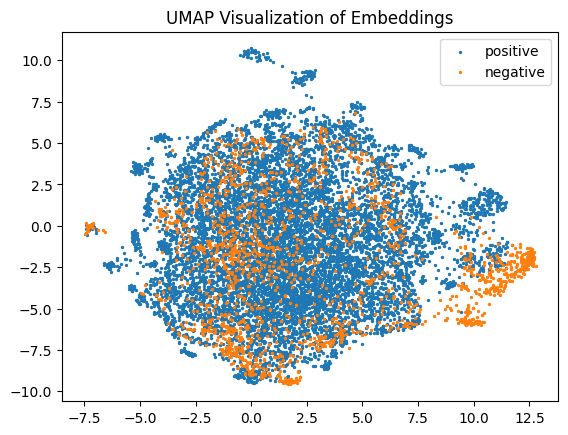

In [72]:
import matplotlib.pyplot as plt
pos_results = fit_model.transform(pos_embeddings)
neg_results = fit_model.transform(neg_embeddings)
plt.scatter(pos_results[:, 0], pos_results[:, 1], s=2, cmap='viridis', label="positive")
plt.scatter(neg_results[:, 0], neg_results[:, 1], s=2, cmap='viridis', label="negative")
plt.legend()
plt.title('UMAP Visualization of Embeddings')
plt.show()

In [10]:
import pandas as pd

compound_classes = pd.read_csv(os.path.join(data_folder, "../../../compound_classes.txt"), sep="\t")

In [13]:
compound_classes

,inchi_key,smiles,cf_kingdom,cf_superclass,cf_class,cf_subclass,cf_direct_parent,npc_class_results,npc_superclass_results,npc_pathway_results,npc_isglycoside
0,IYDKWWDUBYWQGF-NNAZGLEUSA-N,CC(C)CC1NC(=O)C(C)NC(=O)C(=C)N(C)C(=O)CCC(NC(=...,Organic compounds,Organic acids and derivatives,Peptidomimetics,Hybrid peptides,Hybrid peptides,Cyclic peptides; Microcystins,Oligopeptides,Amino acids and Peptides,0
1,KNGPFNUOXXLKCN-ZNCJFREWSA-N,CCC[C@@H](C)[C@@H]([C@H](C)[C@@H]1[C@H]([C@H](...,Organic compounds,Organic acids and derivatives,Peptidomimetics,Depsipeptides,Cyclic depsipeptides,Cyclic peptides,Oligopeptides,Amino acids and Peptides,0
2,WXDBUBIFYCCNLE-NSCMQRKRSA-N,CCCCCCC[C@@H](C/C=C/CCC(=O)NC/C(=C/Cl)/[C@@]12...,Organic compounds,Organoheterocyclic compounds,Oxepanes,NaN,Oxepanes,Lipopeptides,Oligopeptides,Amino acids and Peptides,0
3,CGZKSPLDUIRCIO-RPCRKUJJSA-N,OC1=CC=C(\C=C2\C(=O)C(C3=C4C5=C(C=CC=C5)N=C4\C...,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,NaN,Indoles and derivatives,NaN,NaN,Shikimates and Phenylpropanoids,0
4,USXIYWCPCGVOKF-LERJCCFDSA-N,C[C@H]1[C@@H](OC(C2=CSC([C@H](C(C)(OC(C3=CSC([...,Organic compounds,Organic acids and derivatives,Peptidomimetics,Depsipeptides,Cyclic depsipeptides,Cyclic peptides; Depsipeptides,Oligopeptides,Amino acids and Peptides; Polyketides,0
...,...,...,...,...,...,...,...,...,...,...,...
19819,NHHKFJCWLPPNCN-UHFFFAOYSA-N,O=C1OC(CO)C2OC(OC12)(C)C,Organic compounds,Organic oxygen compounds,Organooxygen compounds,Ethers,Ketals,NaN,NaN,Polyketides,0
19820,WJJBQRNAMWKGNO-UHFFFAOYSA-N,O=C1OC2=CC(=C3C(OC(C4=CC=C(C=C4)N(C)C)CC3=O)=C...,Organic compounds,Phenylpropanoids and polyketides,Flavonoids,Pyranoflavonoids,Pyranoflavonoids,Simple coumarins,Coumarins,Shikimates and Phenylpropanoids,0
19821,YESSRGNVIMVBNT-UHFFFAOYSA-N,O1C2=CC=C(C=C2OC1)C3N4CC5(C)CN3CC(C)(C4)C5,Organic compounds,Organoheterocyclic compounds,Benzodioxoles,NaN,Benzodioxoles,Indolizidine alkaloids,Lysine alkaloids,Alkaloids,0
19822,DYCBCGZSPKZVRY-ASLKBQIFSA-N,O=C(OC=1C=2C(=O)C=3NC(=O)C(=CC=CC(C)C(O)C(C)C(...,NaN,NaN,NaN,NaN,NaN,Ansa macrolides,Macrolides,Polyketides,0


In [66]:
def select_compound_classes(spectra):
    selected_spectra = []
    selected_compound_classes = []
    for spectrum in spectra:
        inchikey = spectrum.get("inchikey")
        row_index = compound_classes.index[compound_classes['inchi_key'] == inchikey].tolist()
        if len(row_index) > 0:
            compound_class = compound_classes["cf_superclass"][row_index].tolist()[0]
            if isinstance(compound_class, str):
                selected_spectra.append(spectrum)
                selected_compound_classes.append(compound_class)
    return selected_spectra, selected_compound_classes
selected_spectra_neg, selected_compound_classes_neg = select_compound_classes(neg_spectra+pos_spectra)

In [67]:
neg_embeddings = model.get_embedding_array(selected_spectra_neg)

8112it [00:52, 153.10it/s]


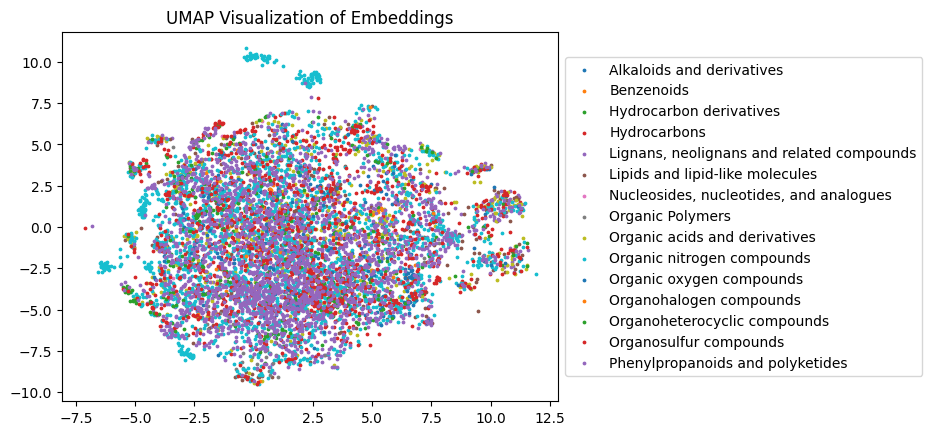

In [68]:
neg_results = fit_model.transform(np.vstack([pos_embeddings,neg_embeddings]))
# Create a scatter plot for each unique label
for label in set(selected_compound_classes_neg):
    indices = [i for i, l in enumerate(selected_compound_classes_neg) if l == label]
    plt.scatter(neg_results[indices, 0], neg_results[indices, 1], label=label, s = 3)

# plt.scatter(neg_results[:, 0], neg_results[:, 1], s=5, cmap='viridis', c=encoded_labels)
plt.legend(np.unique(selected_compound_classes_neg), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('UMAP Visualization of Embeddings')
plt.show()